In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from common import *
from preprocess import base
from analysis import integrate

% matplotlib inline

In [2]:
root_dir = os.getcwd()

In [3]:
def zw_original(path):
    data = pd.read_csv(path)
    name_list = get_name_zw()
    sub_data = data[name_list]
    return sub_data

def hw_original(path):
    data = pd.read_csv(path)
    name_list = get_name_hw()
    sub_data = data[name_list]
    return sub_data

def sdmc_original(path):
    data = pd.read_csv(path)
    name_list = get_name_sdmc()
    sub_data = data[name_list]
    return sub_data

def zw_sub_hw(path):
    data = pd.read_csv(path)
    temp_diff = pd.DataFrame()
    for i in np.arange(1, 7):
        name_hw = "ZX_HW{0}_{1}".format(2, i)
        for j in np.arange(1, 7):
            name_zw = "ZX_WD_{0}_{1}".format(i, j)
            temp_diff[name_zw] = data[name_zw] - data[name_hw]
    return temp_diff

def get_temp_mean(path):
    zws = zw_original(path)
    hws = hw_original(path)
    zw_mean = zws.mean(axis=1)
    hw_mean = hws.mean(axis=1)
    d = {'zw_mean': zw_mean,
         'hw_mean': hw_mean}
    df = pd.DataFrame(d)
    return df

def get_piece_corr_segment(data, win):
    start = 0
    end = start + win
    corr_value = []
    while end<len(data):
        sub = data.loc[start:end,:]
        corr_value.append(abs(sub.corr()).sum().sum()/data.shape[1])
        end += win
        start += win
    return corr_value

def get_piece_corr_rolling(data, win):
    start = 0
    end = start + win
    corr_value = []
    while end<len(data):
        sub = data.loc[start:end,:]
        corr_value.append(abs(sub.corr()).sum().sum()/data.shape[1])
        end += 1
        start += 1
    return corr_value

def get_dist_p(X, Y, p):
    return np.power(X-Y, p).sum()**(1/p)

def get_piece_dist_segment(X, Y, win, p):
    if(len(X) != len(Y)):
        print("not equal length series!!!!!!")
        return
    start = 0
    end = start + win
    results = []
    while end<len(X):
        results.append(get_dist_p(X[start:end], Y[start:end], p))
        start += win
        end += win
    return results

In [4]:
def get_sdmc_mean(path):
    data = pd.read_csv(path)
    sdmc = sdmc_original(path)
    sdmc['mean'] = sdmc.mean(axis=1)
    return sdmc
def sdmc_mean_main(data_dir):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df = get_sdmc_mean(path)
        ax = df.plot(figsize=(10,2))
        ax.set_title(file)
        ax.legend(loc='best', prop={'size':8})

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


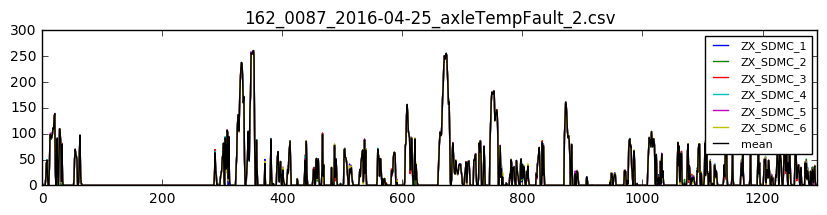

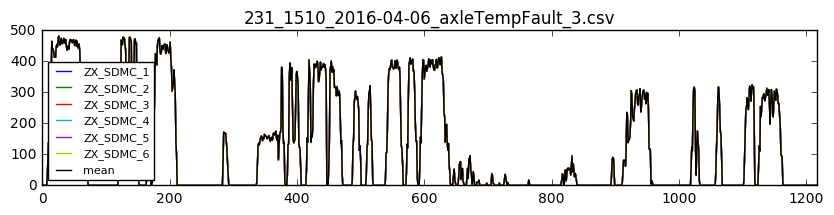

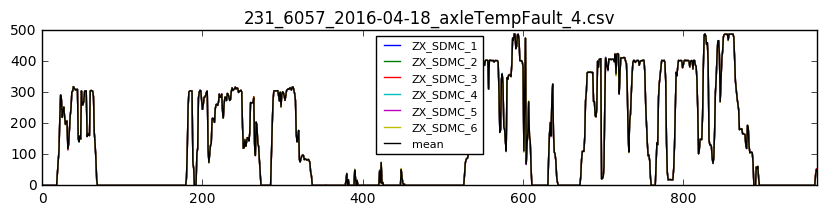

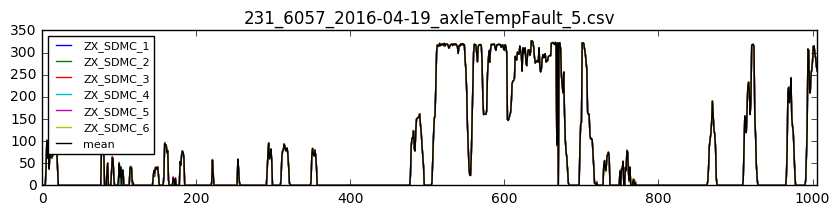

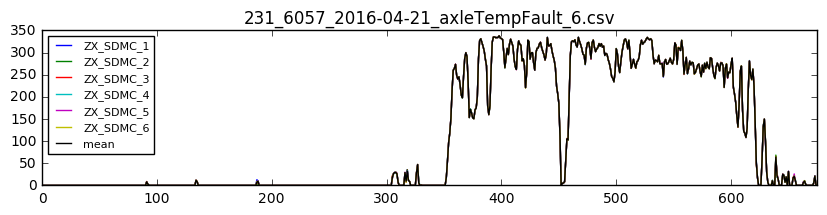

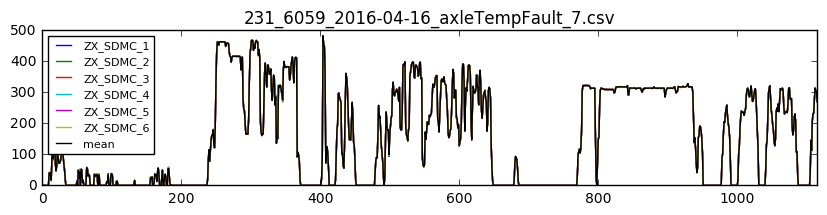

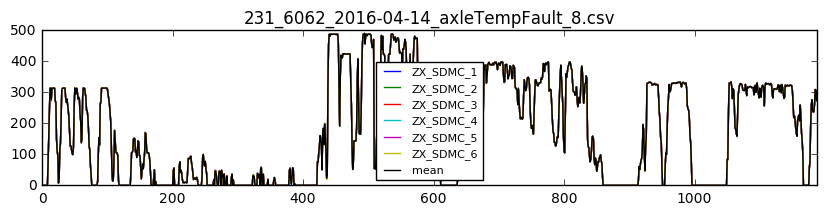

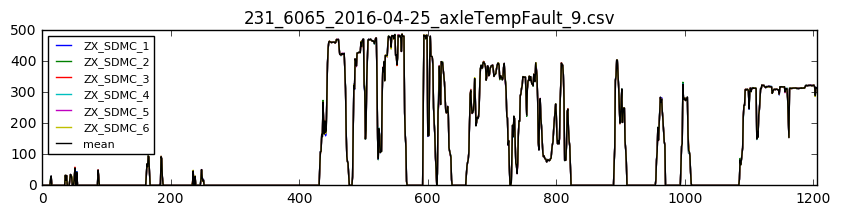

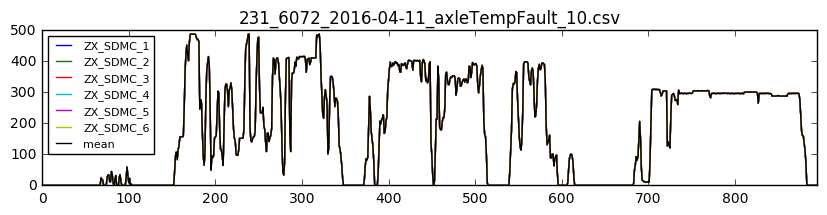

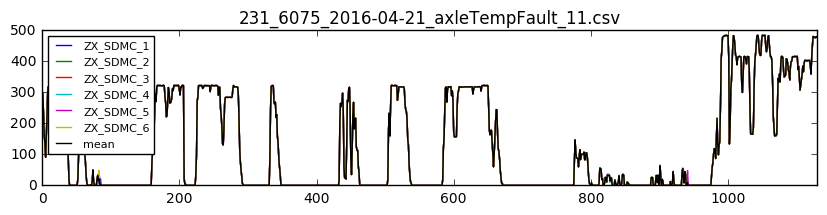

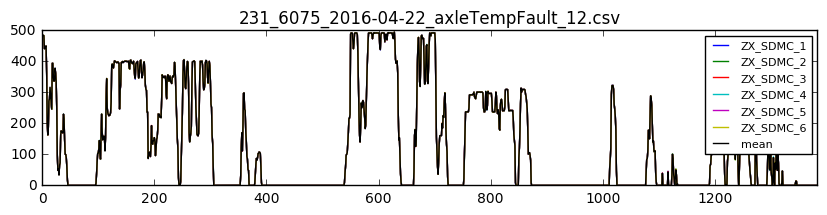

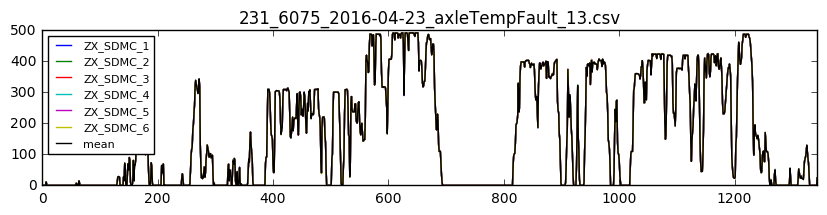

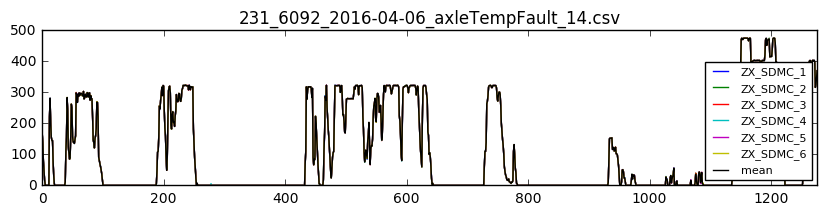

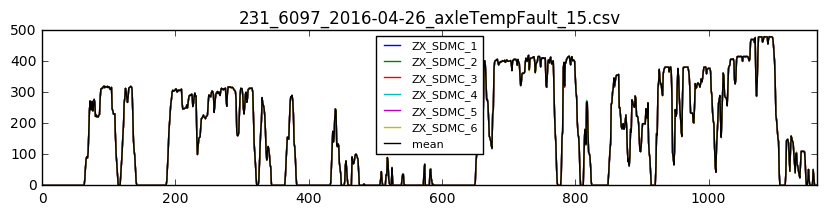

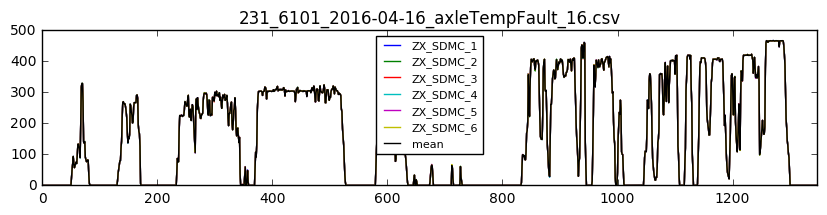

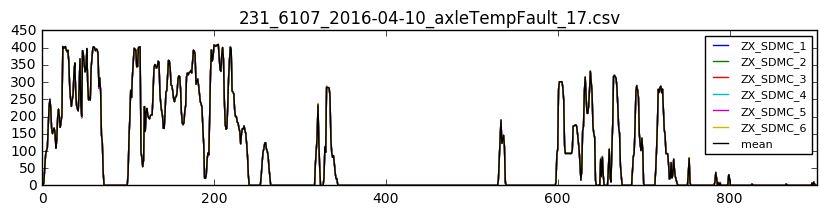

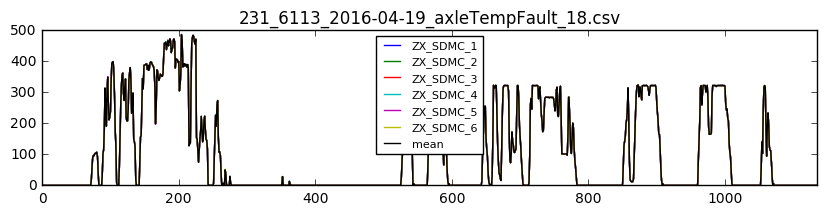

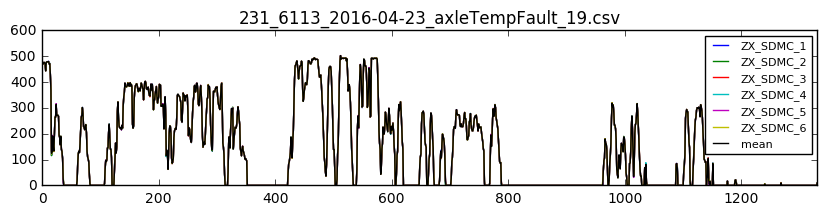

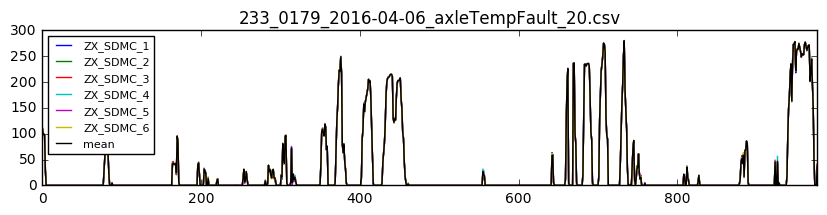

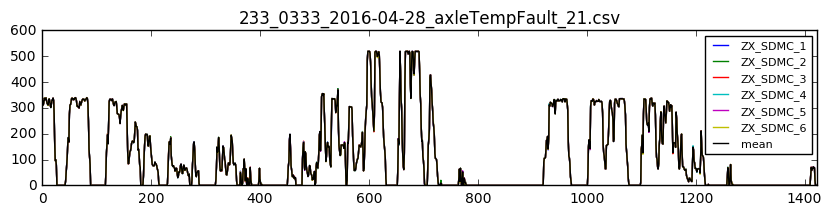

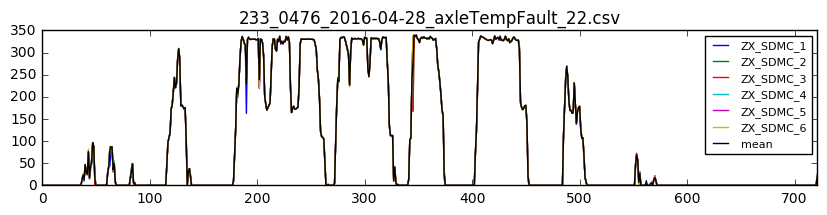

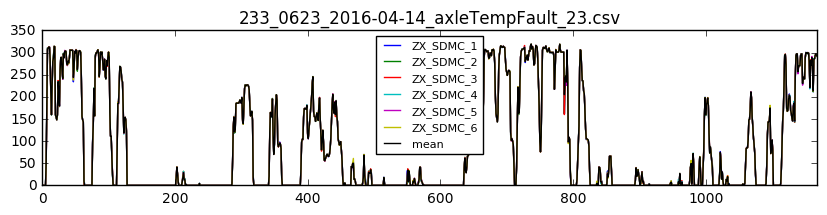

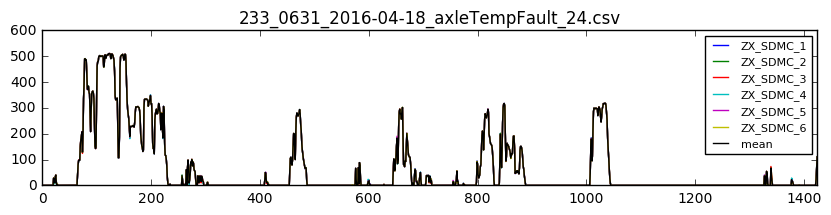

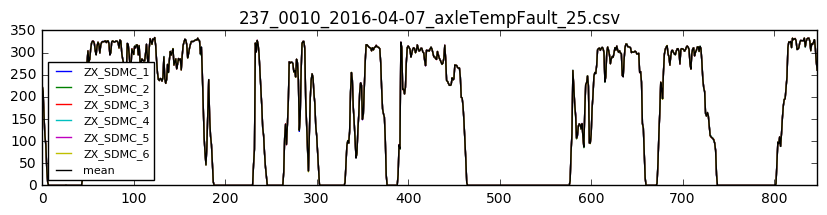

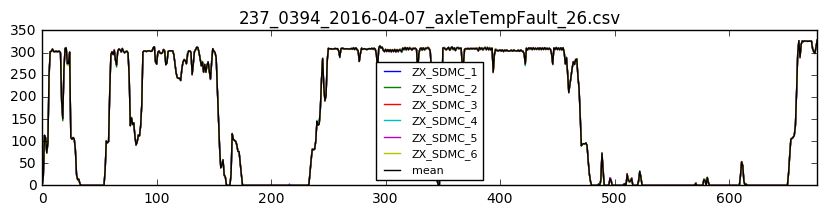

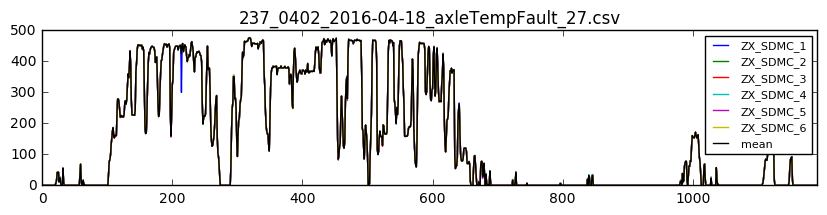

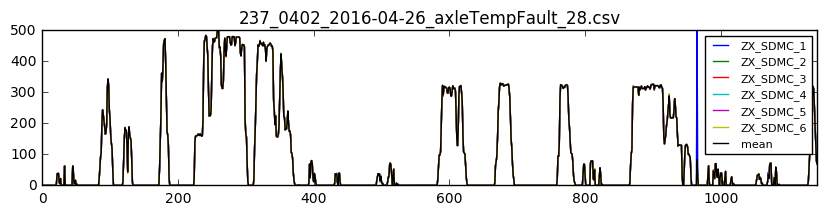

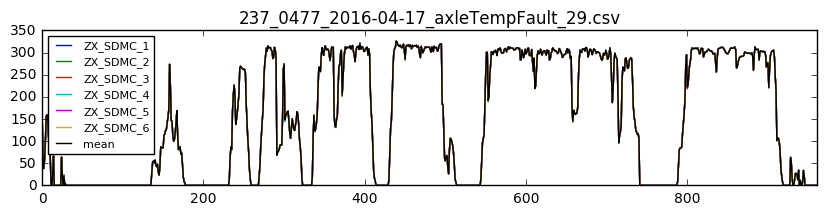

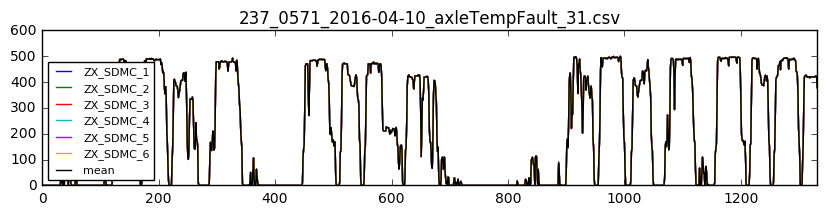

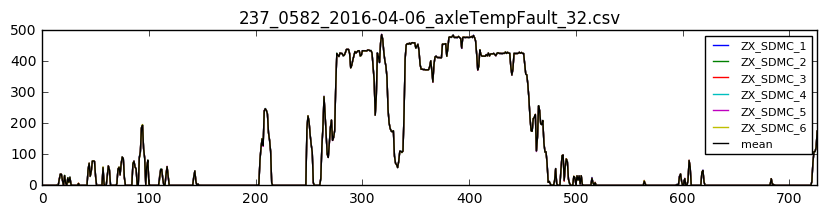

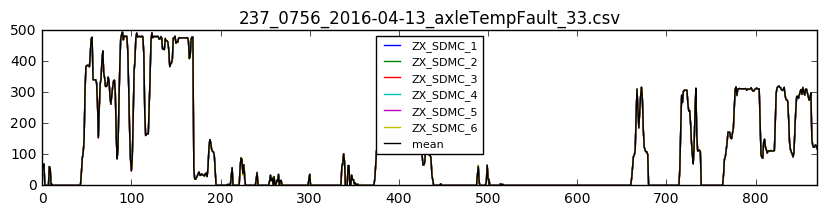

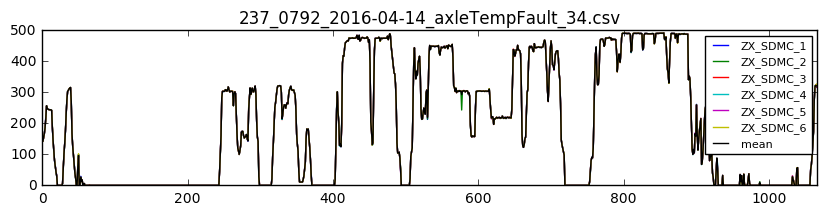

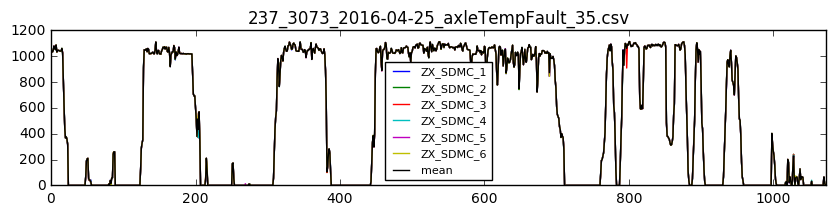

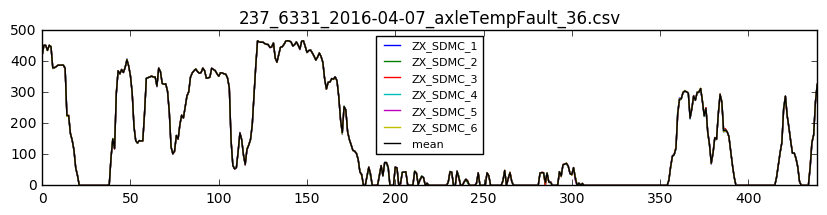

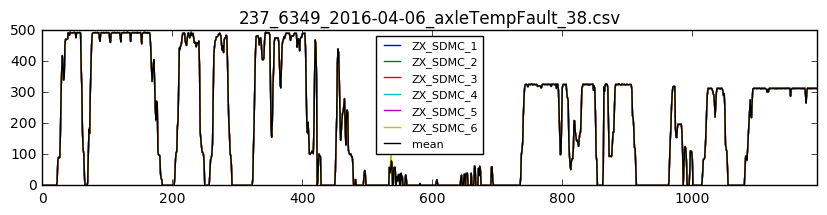

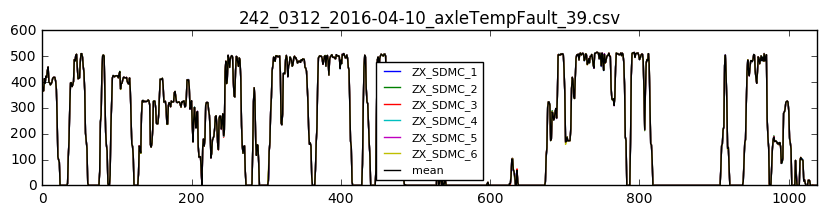

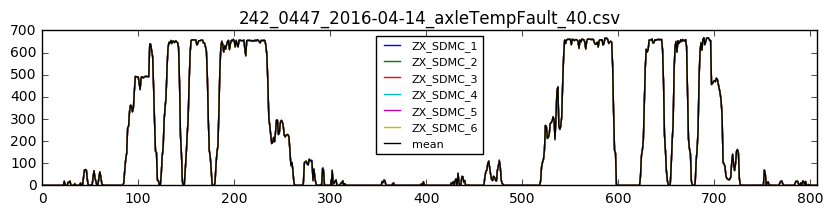

In [5]:
data_dir = root_dir + "/data_fault/smooth_mean_interpolate_bin_mean/"
sdmc_mean_main(data_dir)

In [6]:
def get_sdmc_mean_speed(path):
    data = pd.read_csv(path)
    sdmc = sdmc_original(path)
    
    sdmc_mean = sdmc.mean(axis=1)
    d = {'sdmc_mean': sdmc_mean,
         'speed': data['ZD_SPEED']}
    df = pd.DataFrame(d)
    return df
def sdmc_mean_speed_main(data_dir):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df = get_sdmc_mean_speed(path)
        ax = df.plot(figsize=(12,2))
        ax.set_title(file)
        ax.legend(loc='best')

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


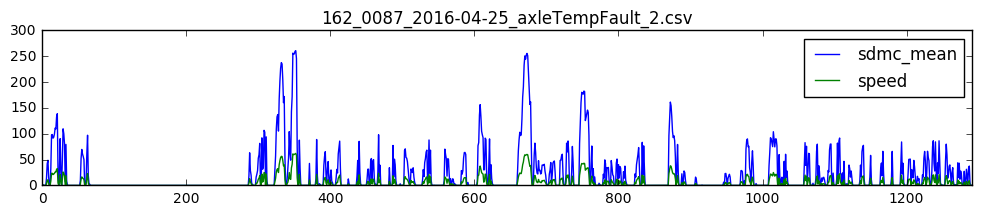

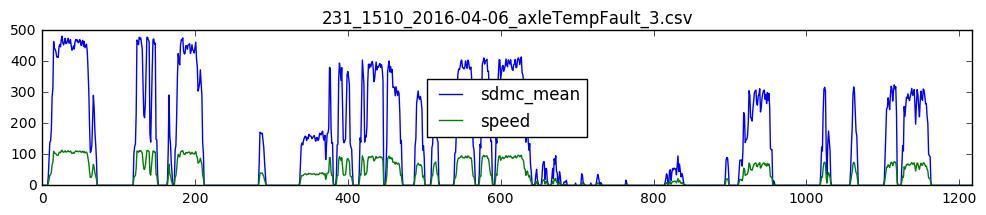

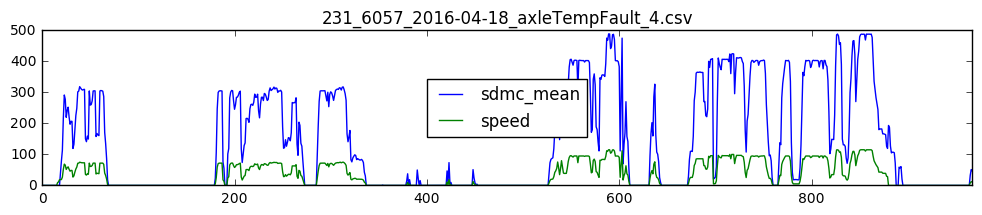

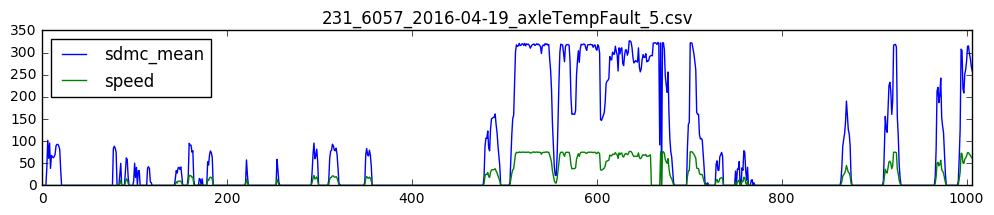

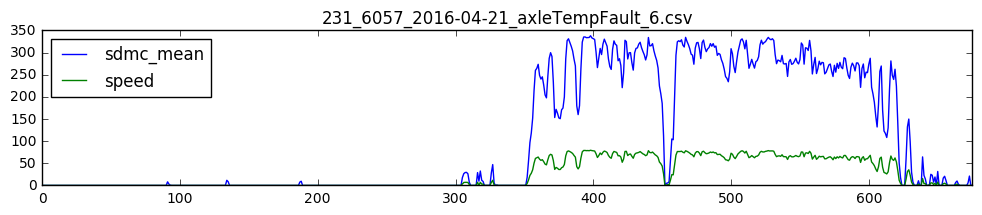

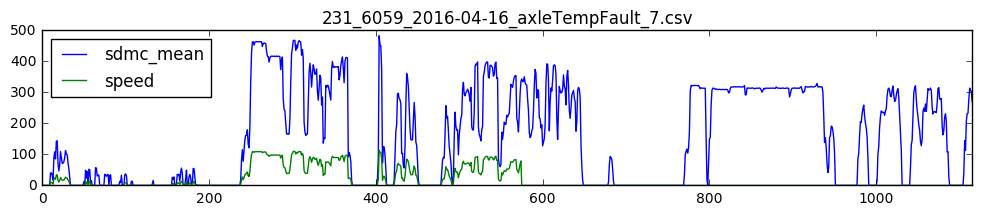

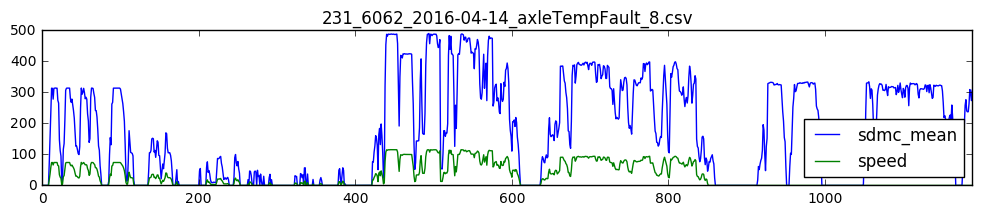

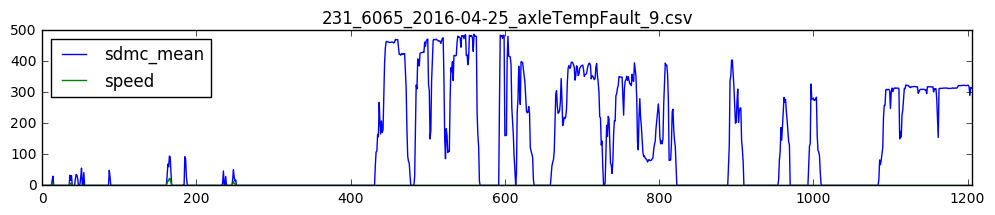

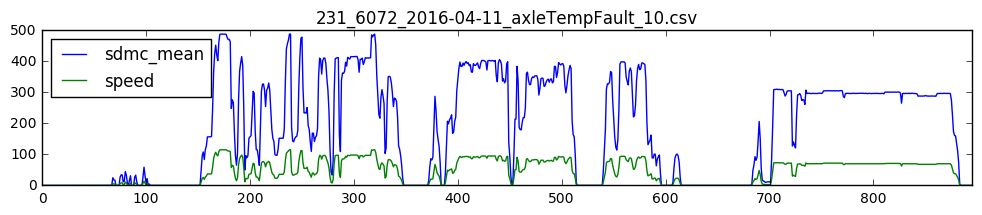

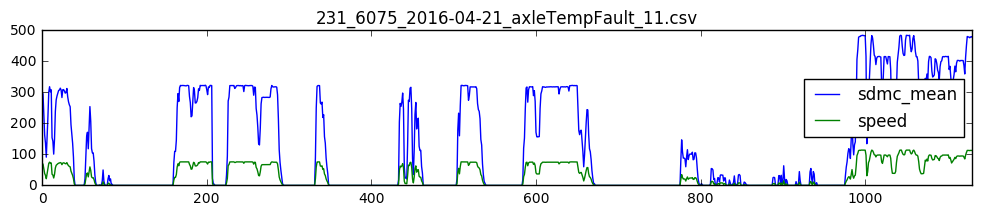

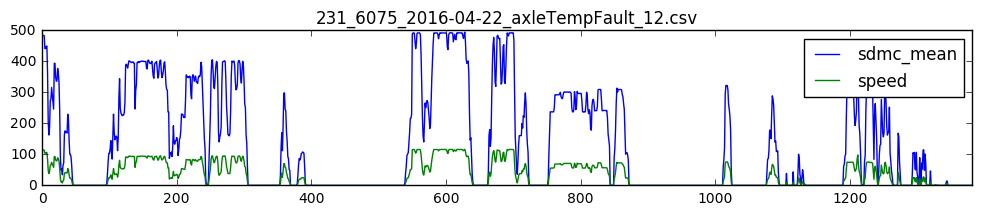

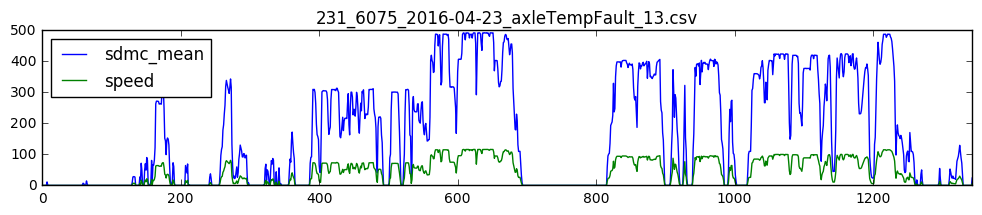

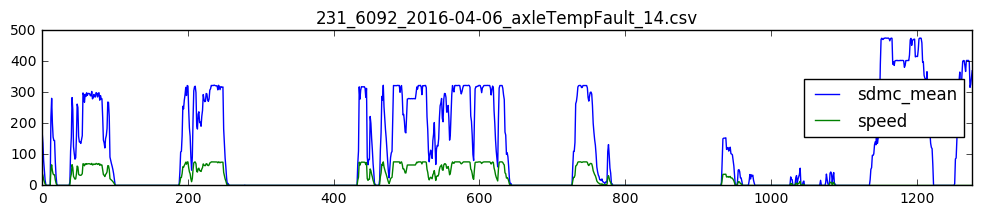

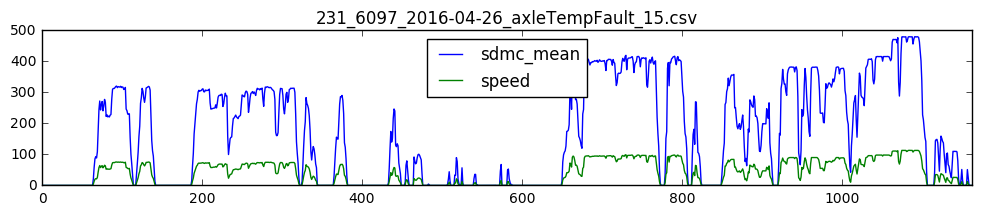

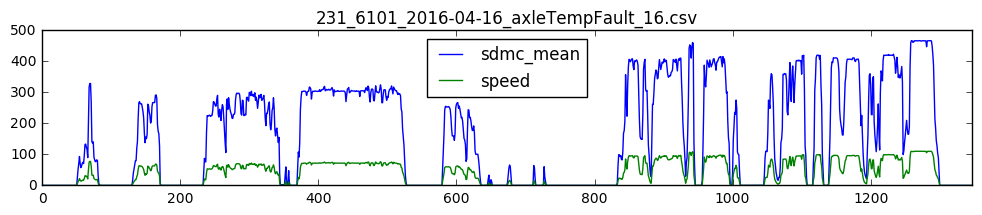

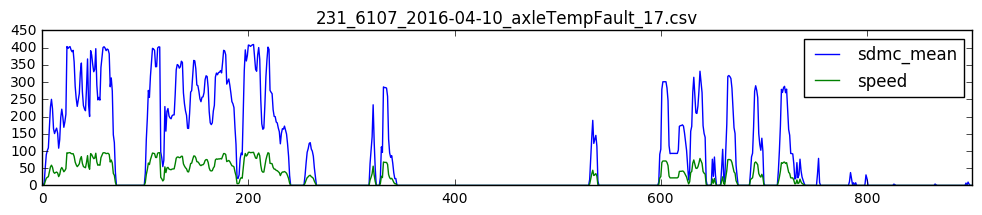

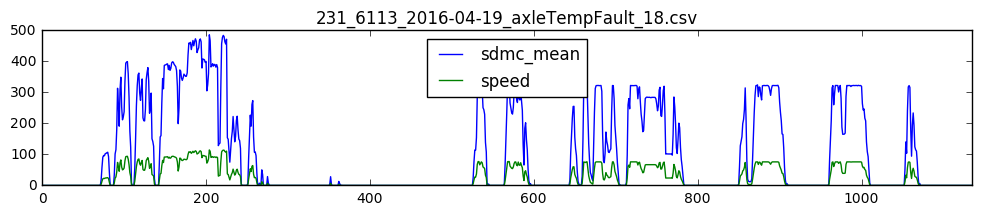

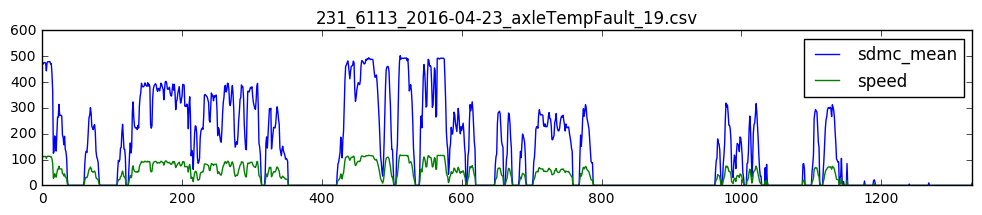

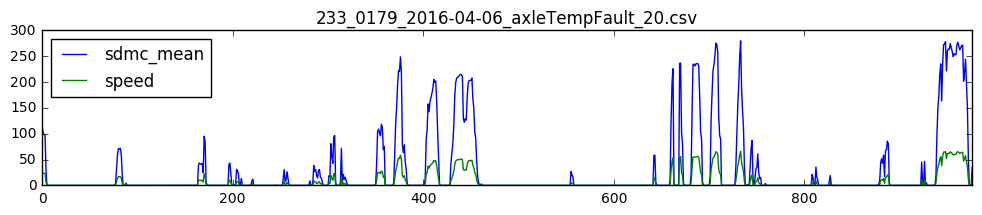

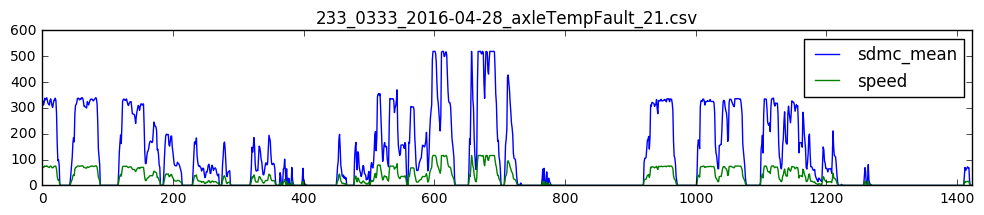

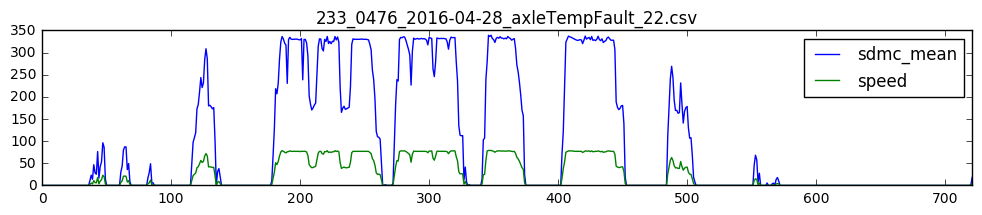

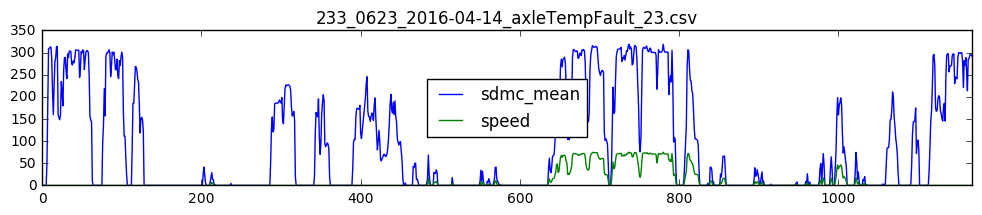

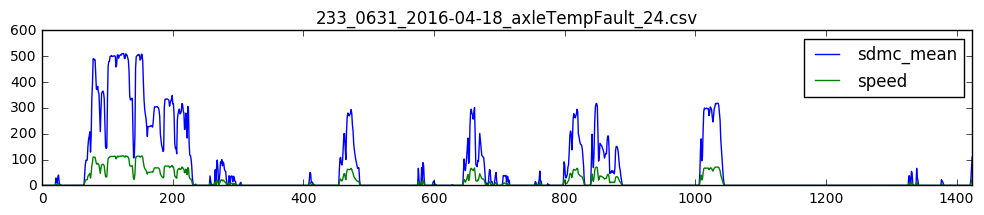

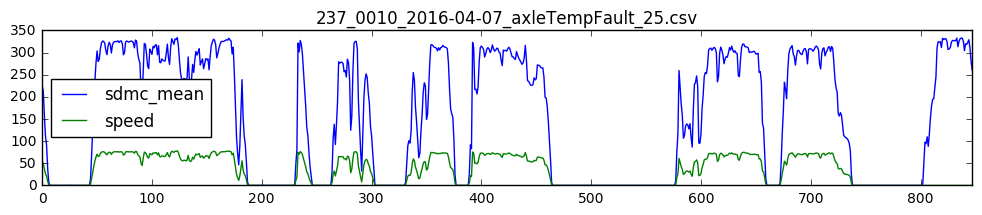

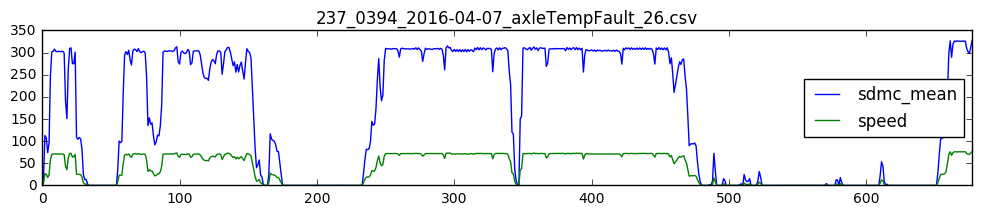

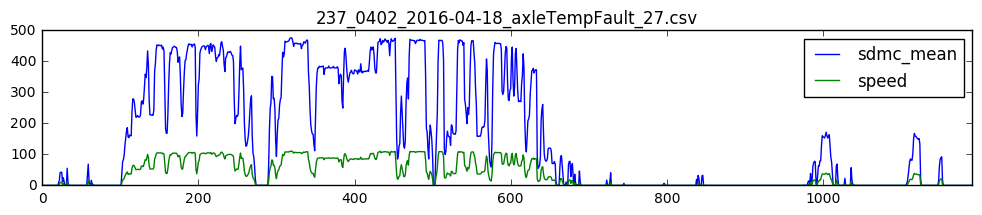

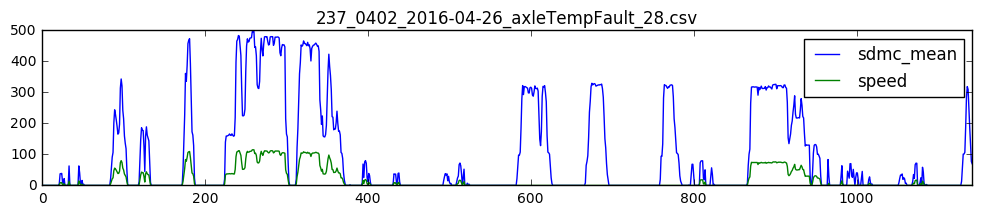

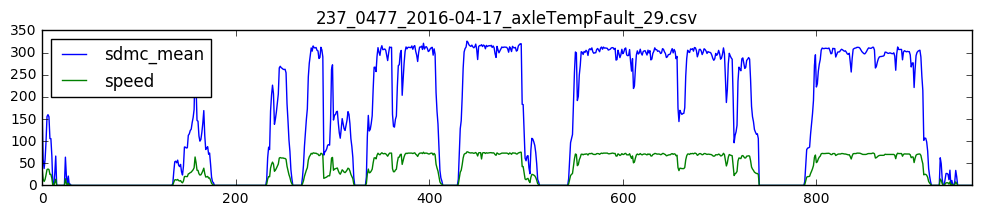

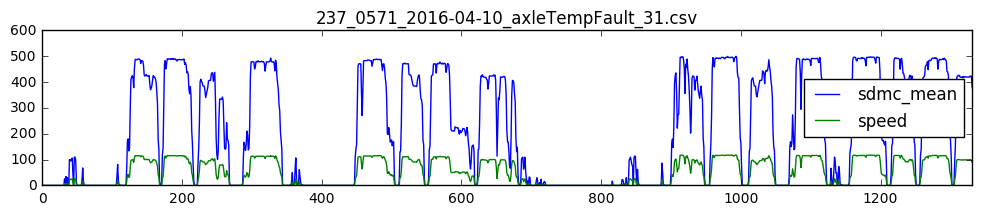

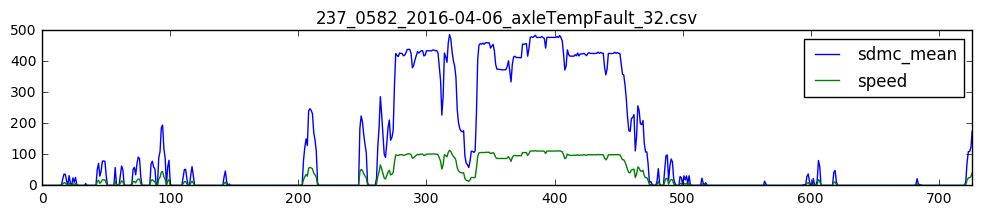

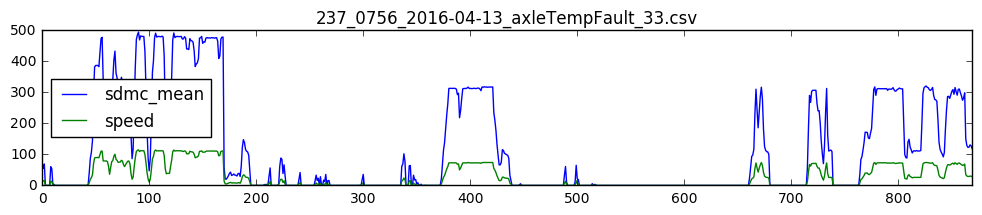

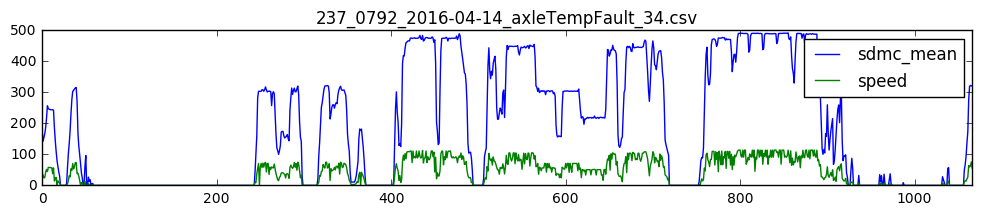

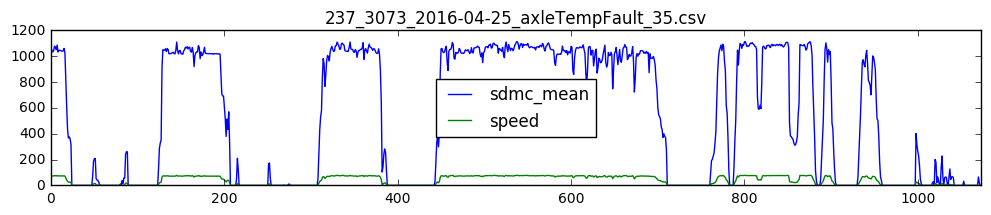

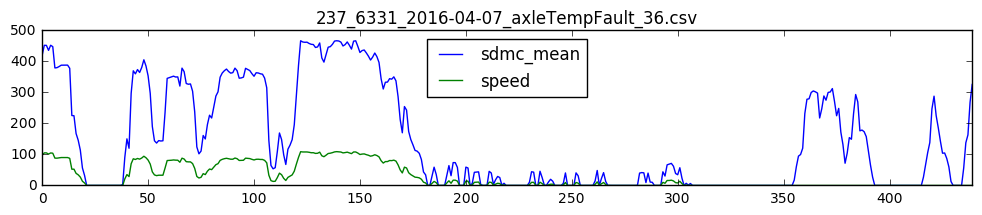

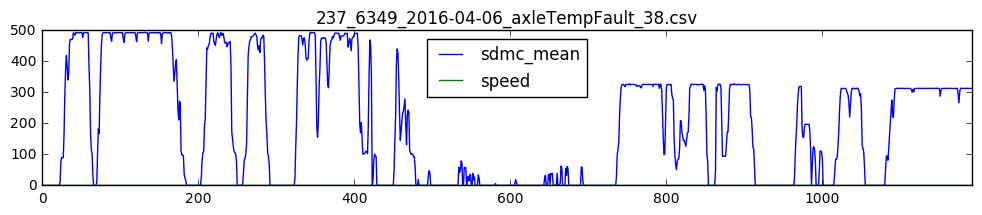

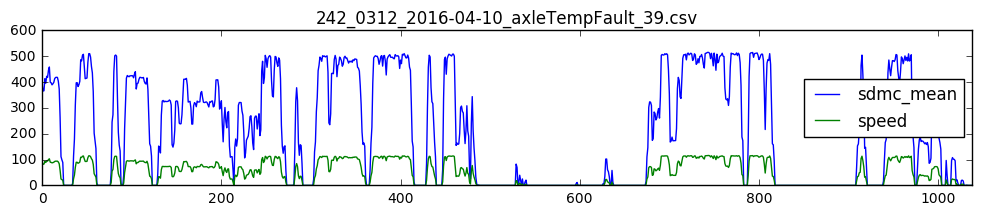

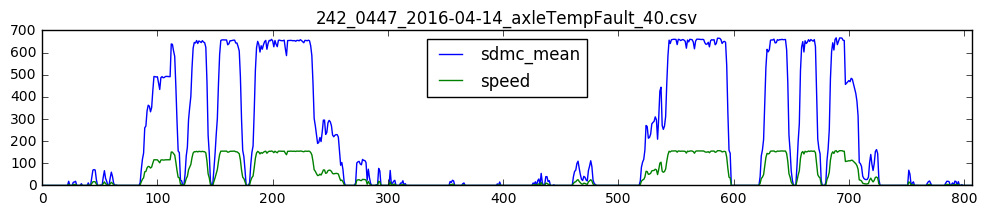

In [7]:
data_dir = root_dir + "/data_fault/smooth_mean_interpolate_bin_mean/"
sdmc_mean_speed_main(data_dir)

In [23]:
def plot_data(df, title):
    ax = df.plot(figsize=(12,2))
    ax.set_title(title)
    ax.legend(loc='best')

def temp_mean(data_dir, win_rate = 0.3, normalization=False):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df= integrate.get_temp_mean(path)
        if normalization:
            df = (df-df.mean())/(df.std())
        plot_data(df, file)
        plt.figure(figsize=(12,2))
        corr = np.array(integrate.get_piece_corr_rolling(df, int(len(df)*win_rate)))
        corr -= 1
        plt.plot(corr)
        plt.title("similarity")
        plt.ylim((0, 1))

/home/happyling/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


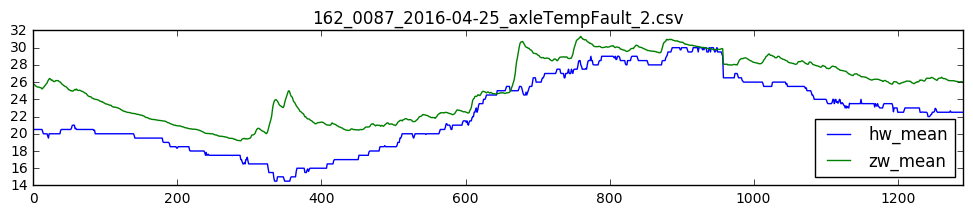

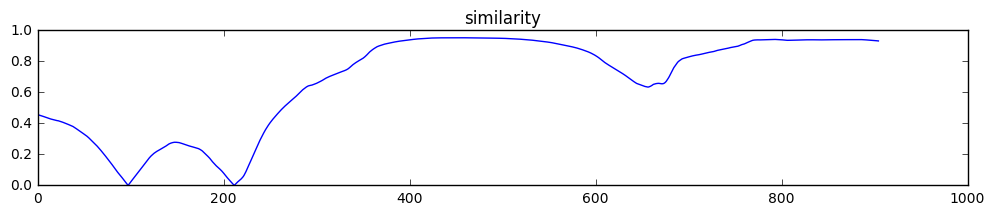

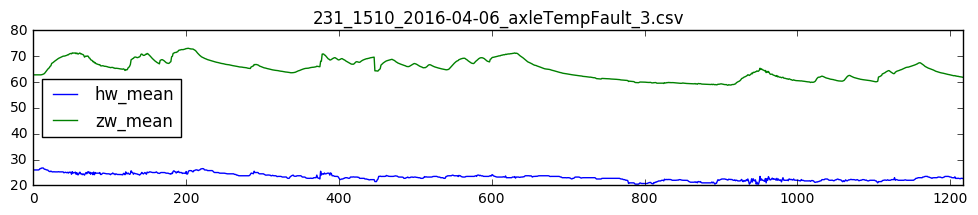

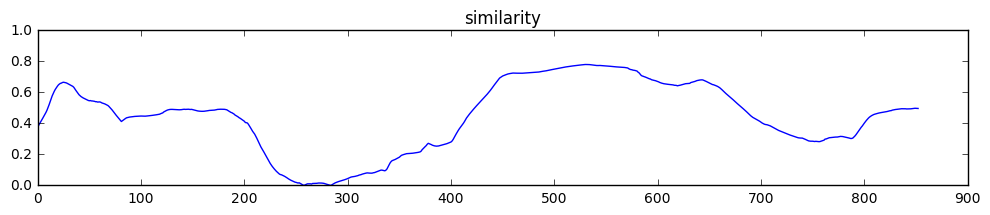

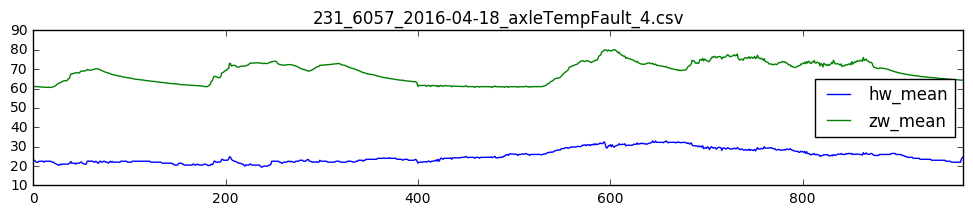

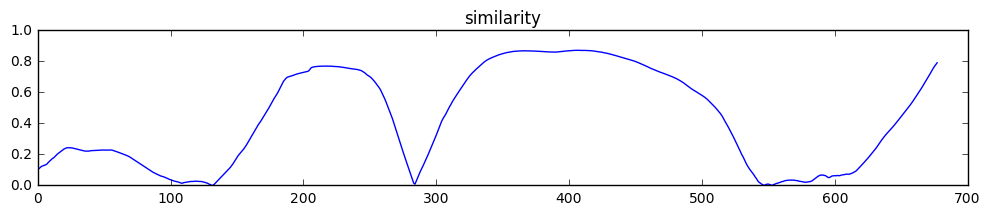

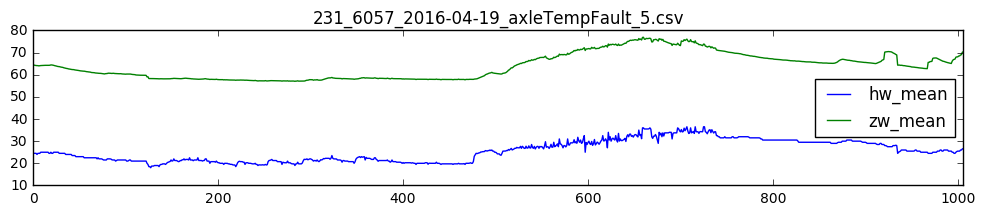

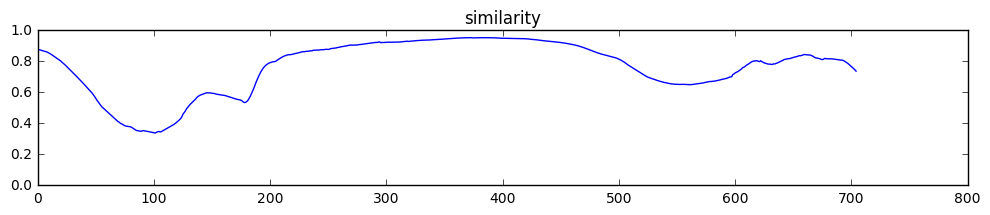

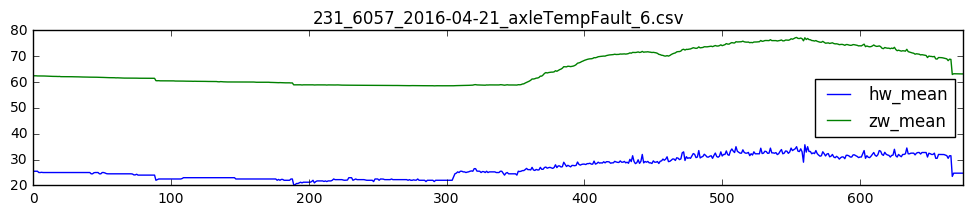

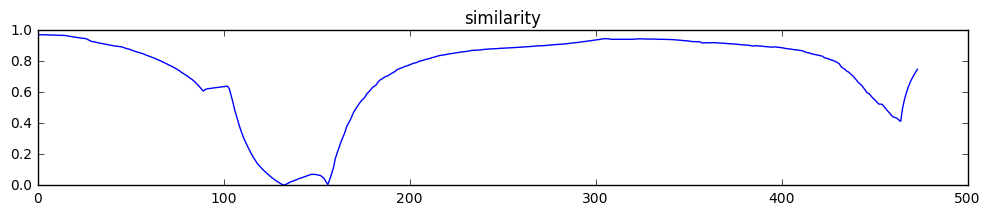

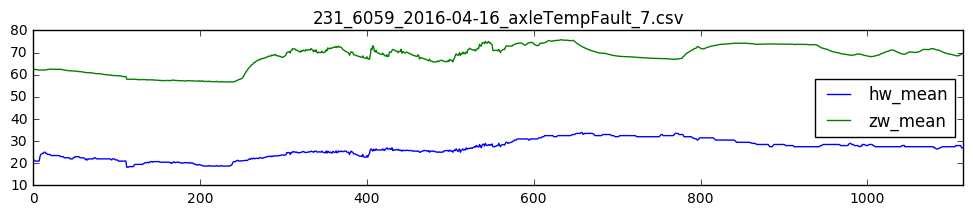

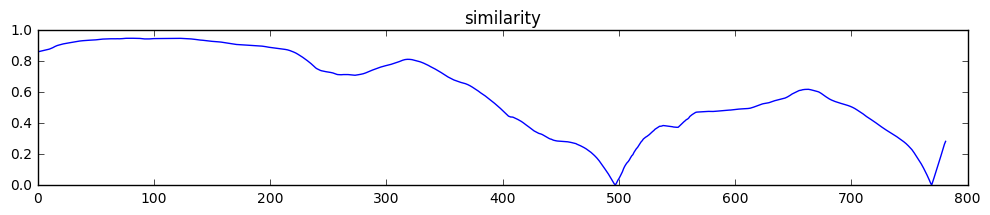

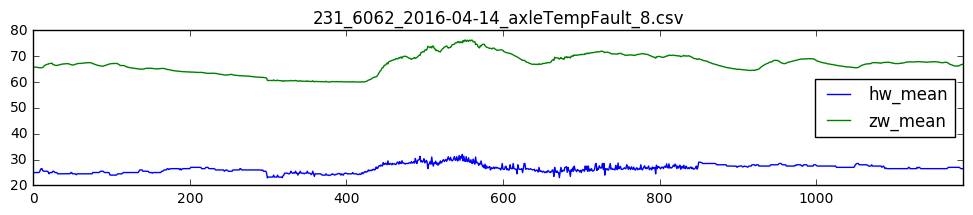

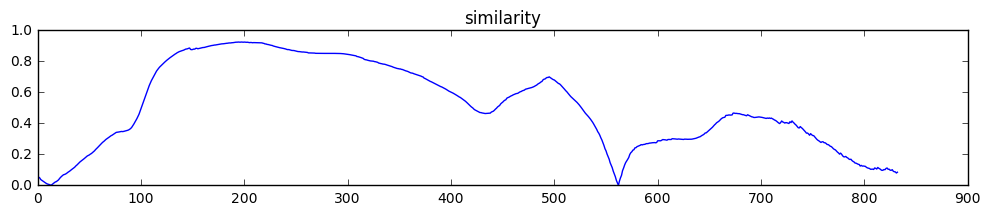

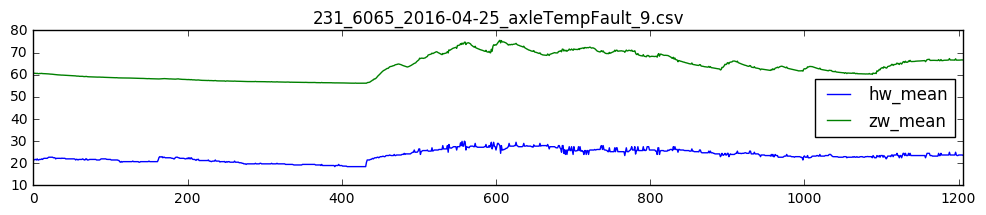

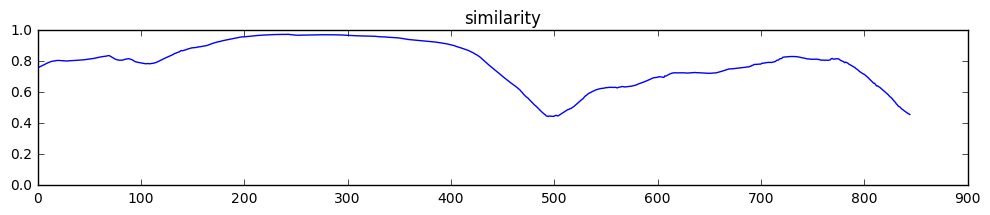

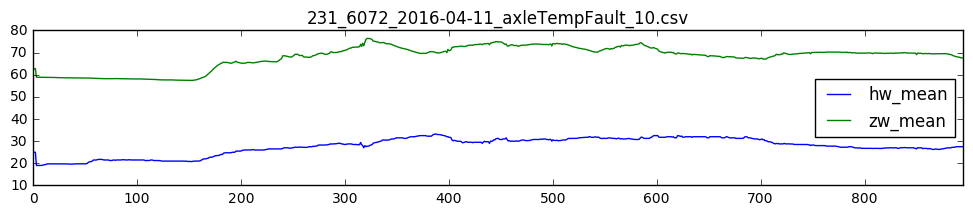

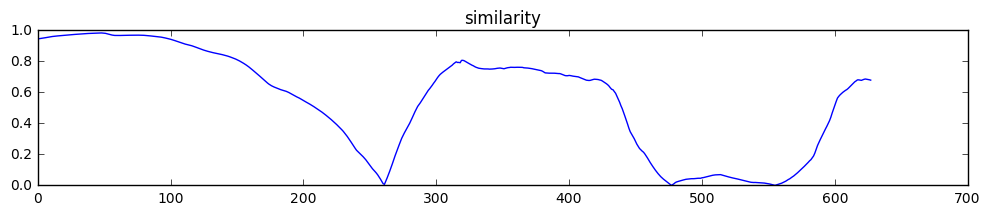

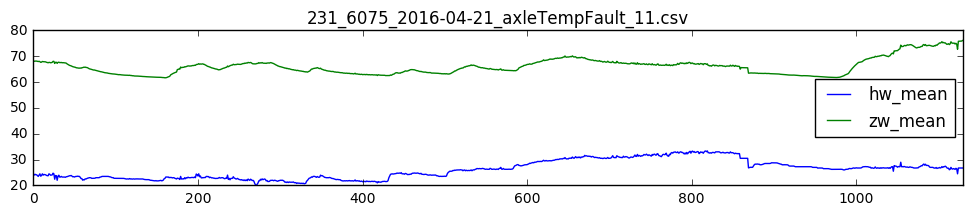

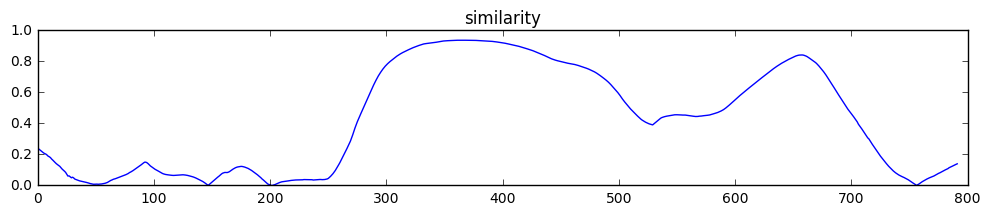

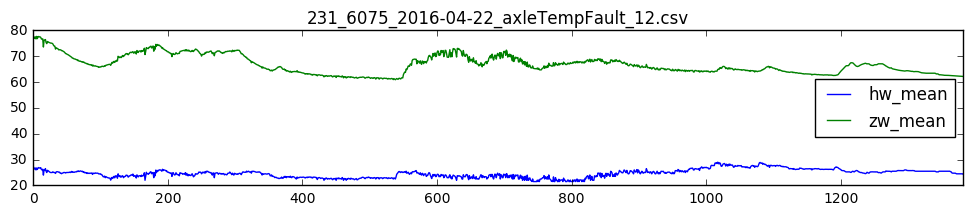

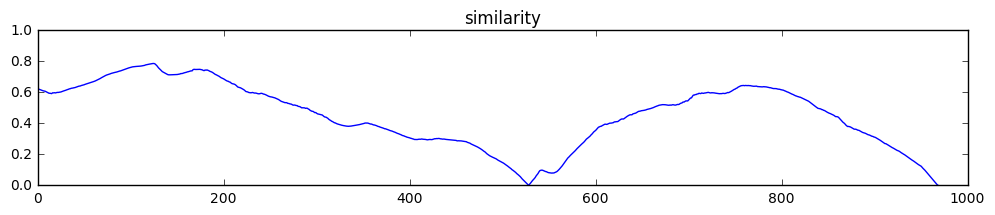

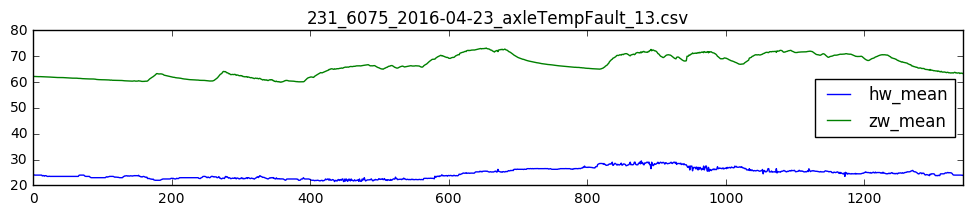

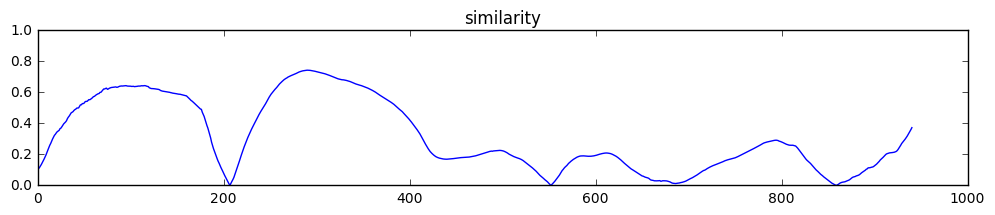

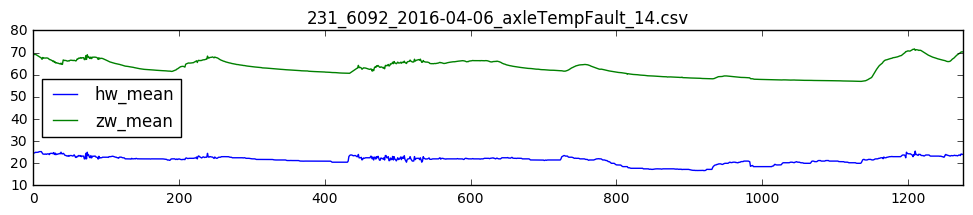

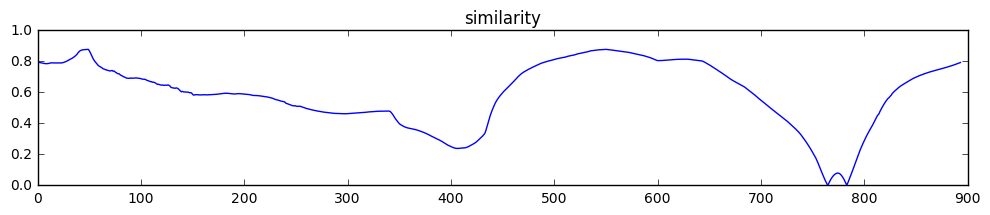

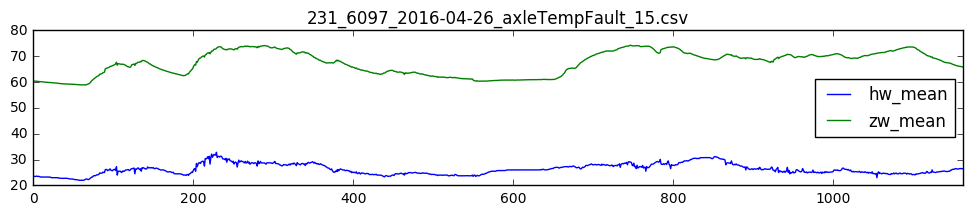

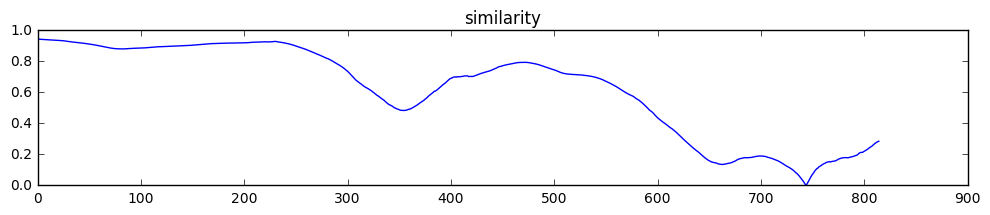

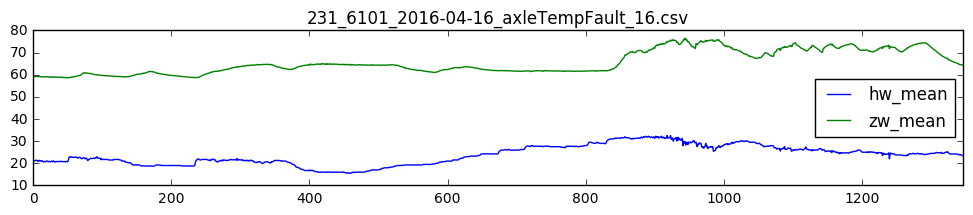

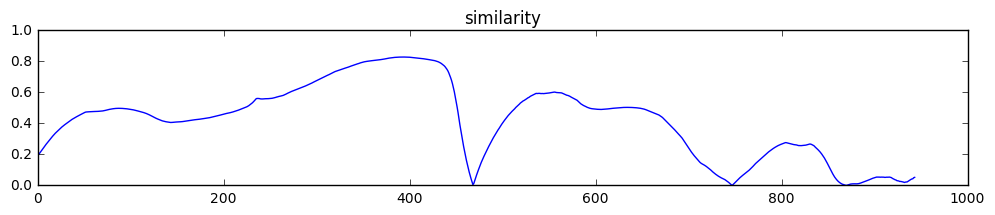

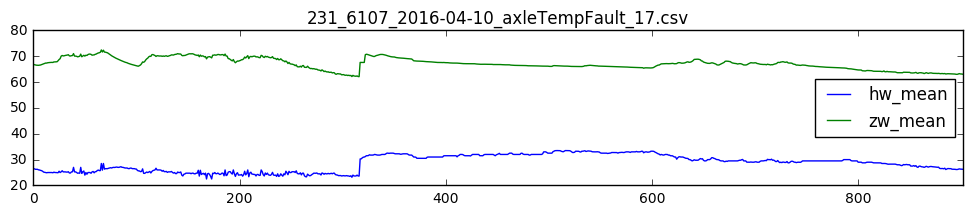

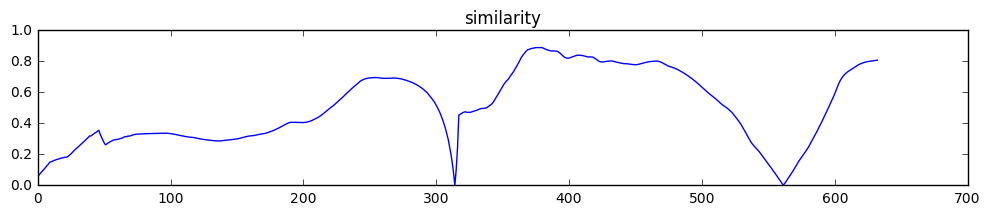

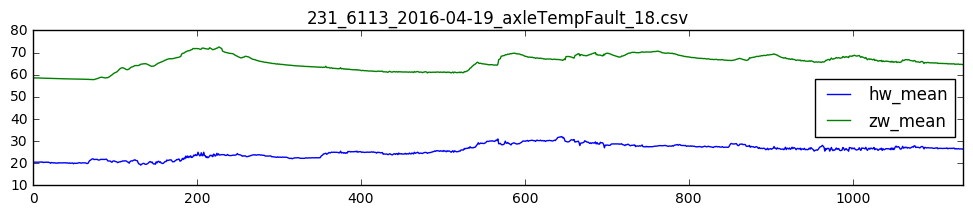

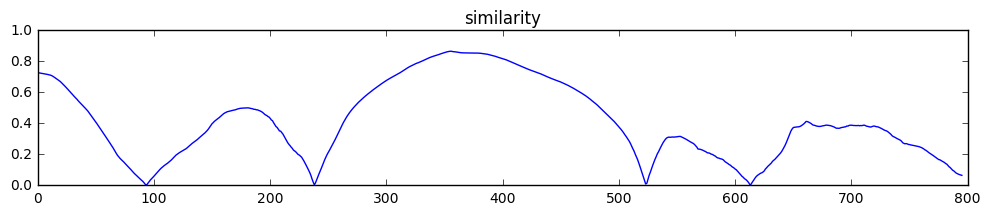

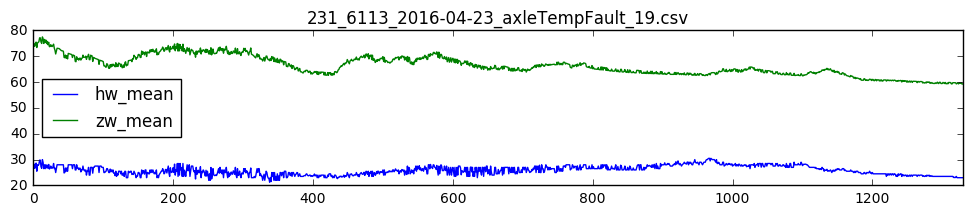

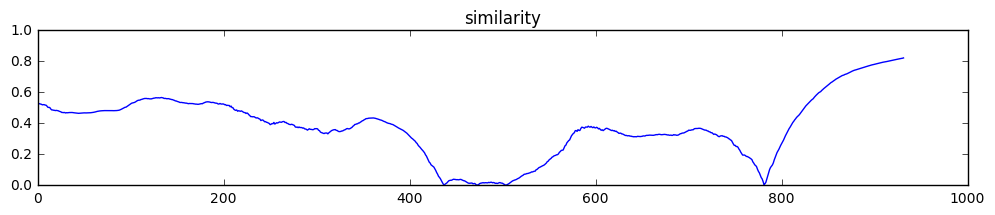

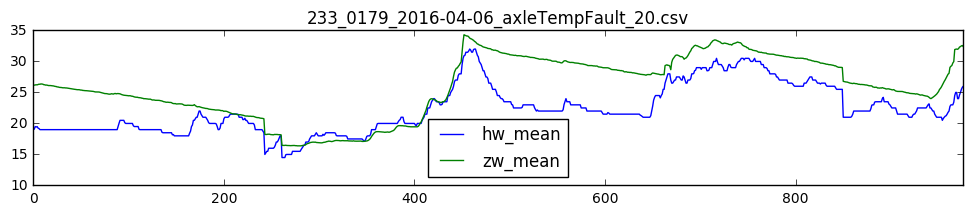

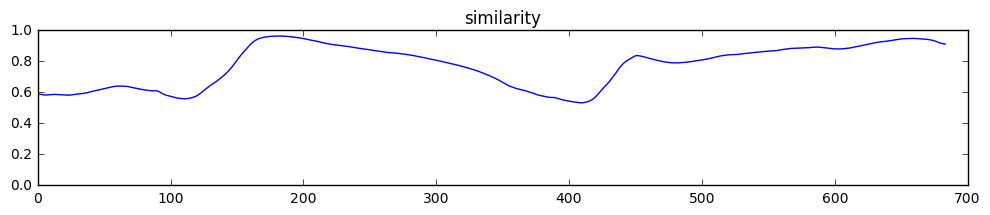

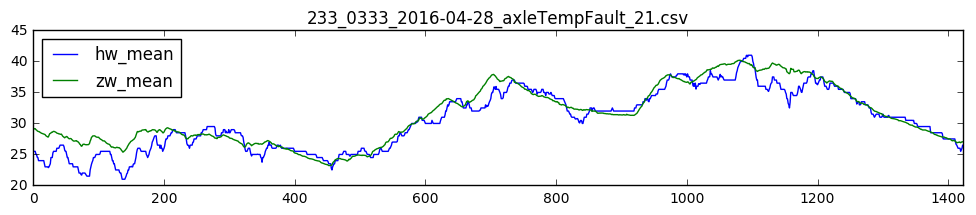

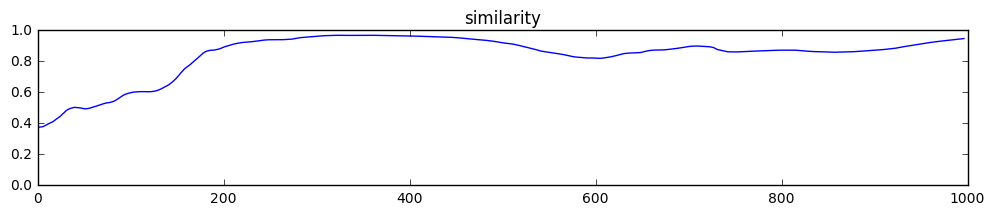

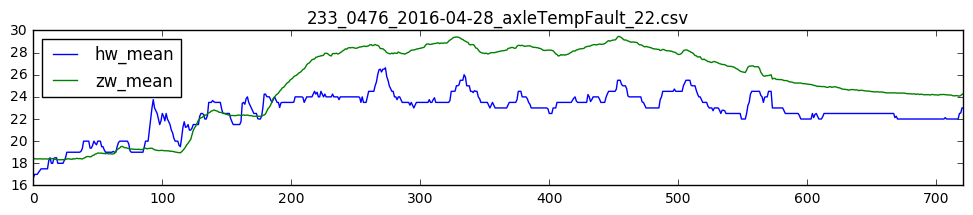

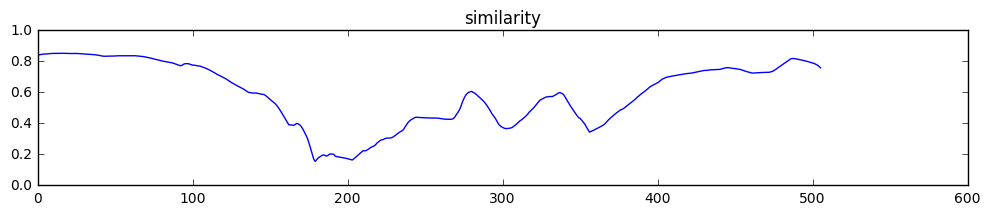

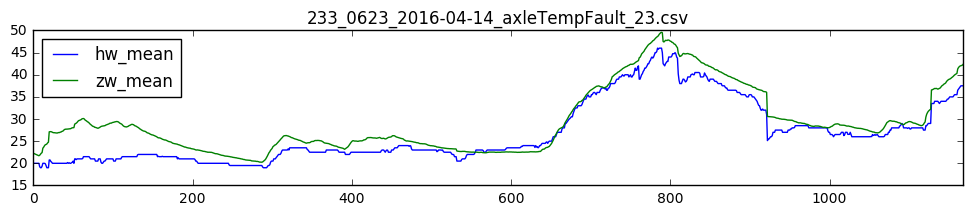

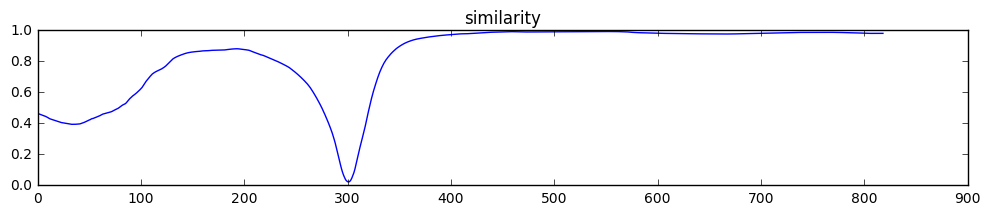

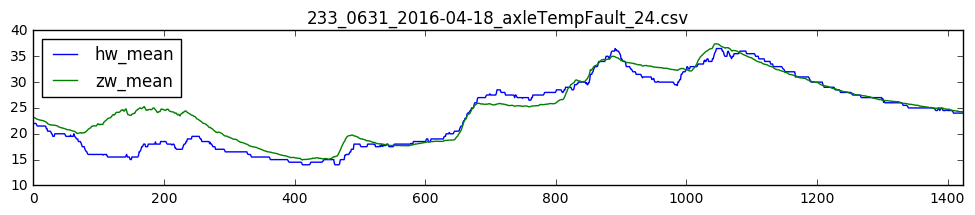

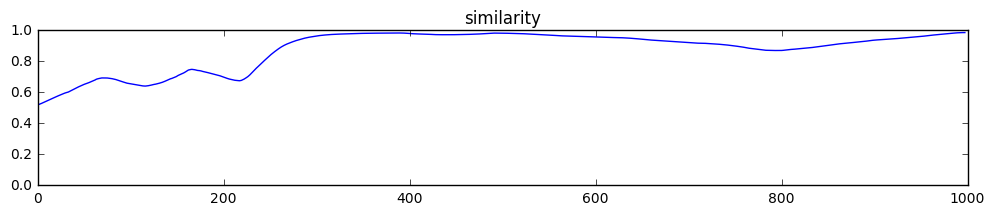

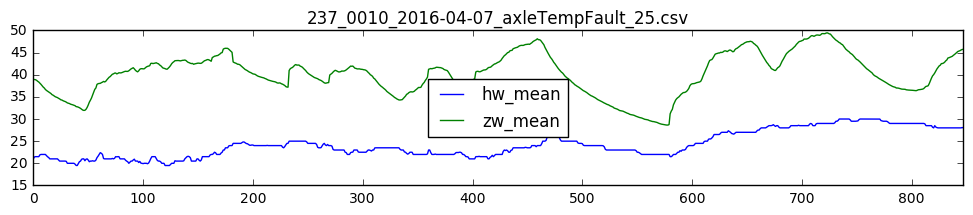

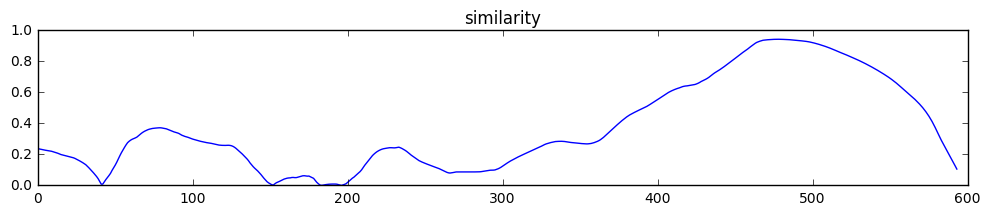

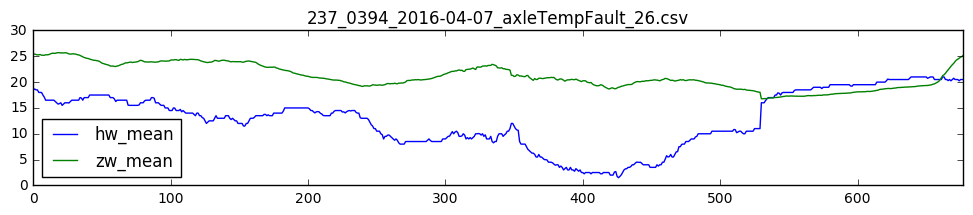

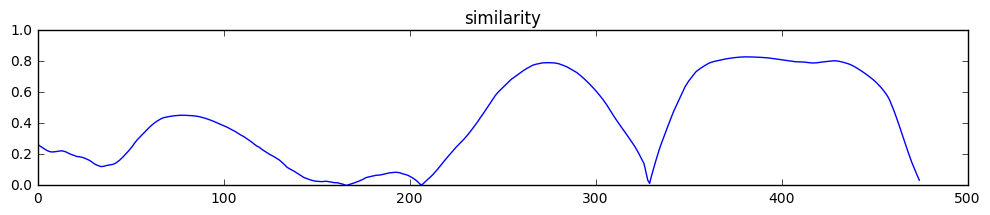

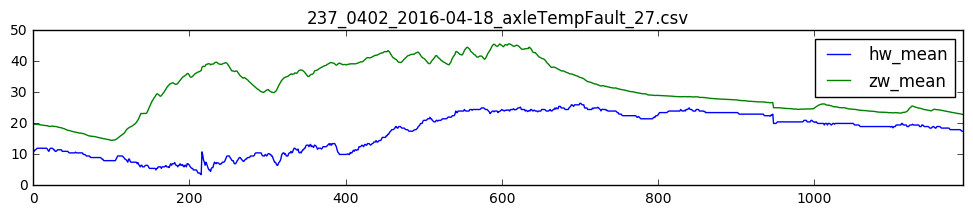

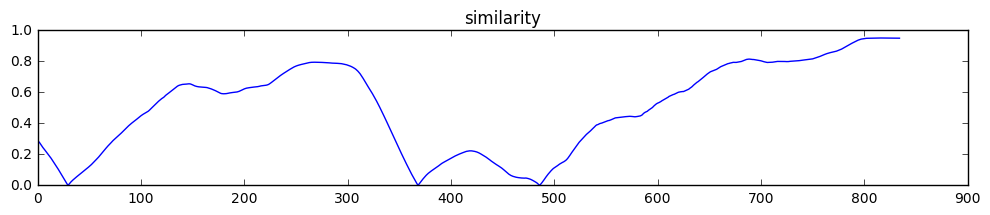

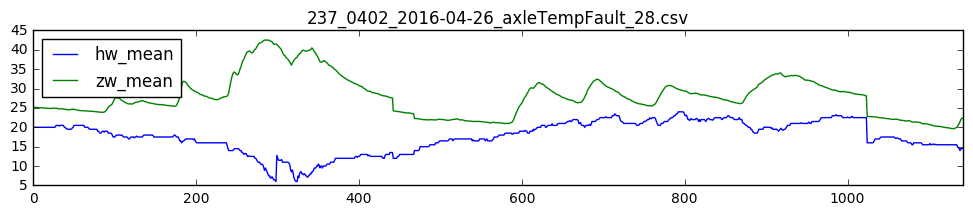

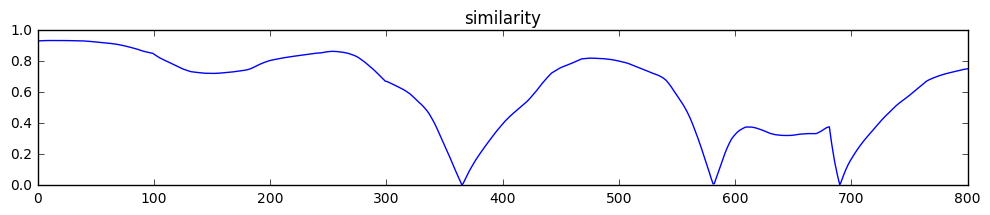

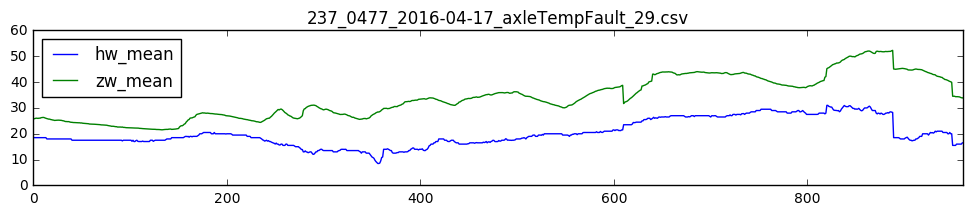

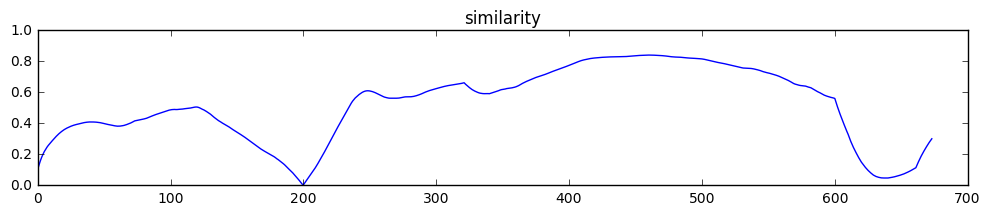

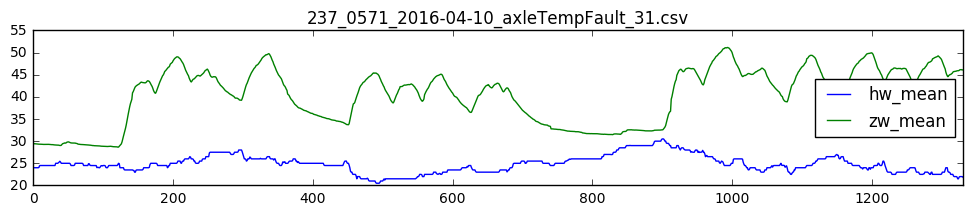

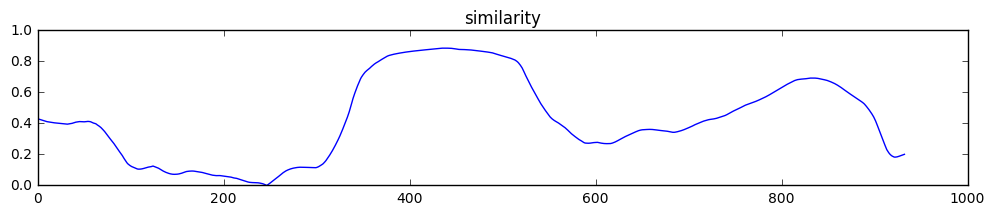

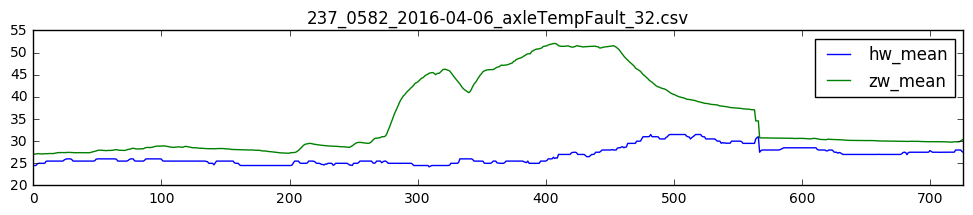

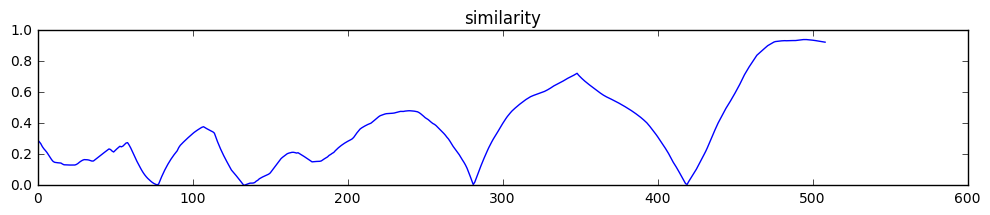

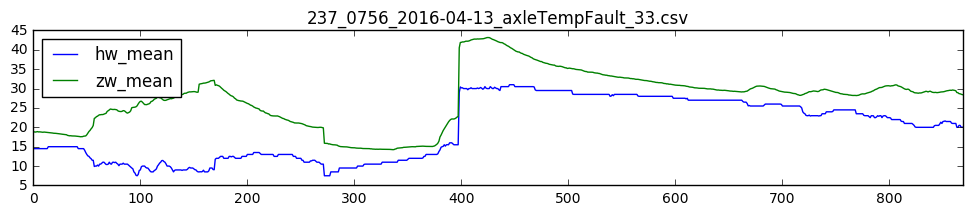

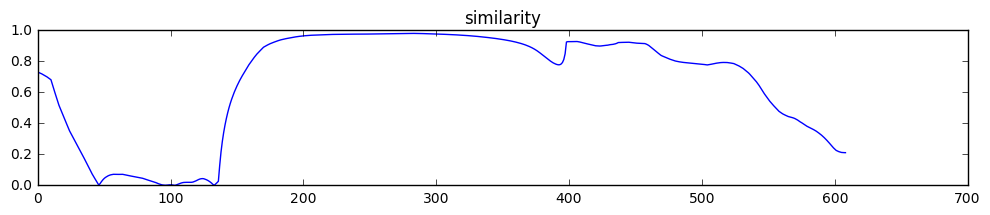

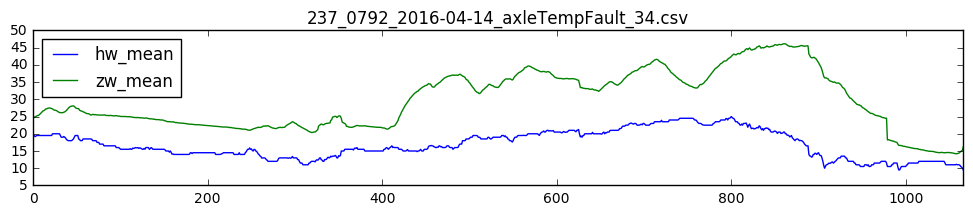

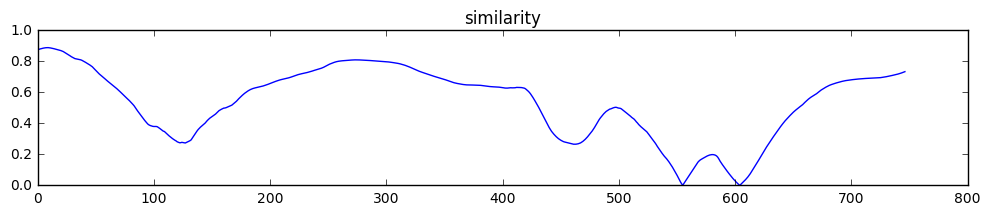

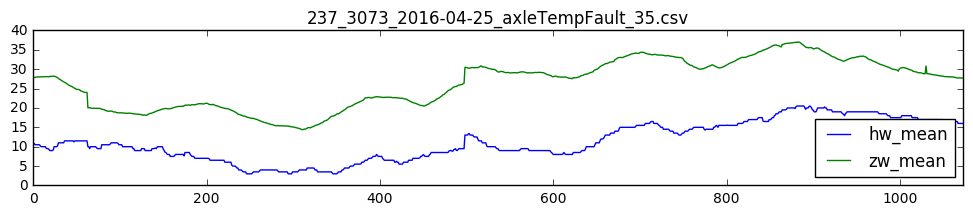

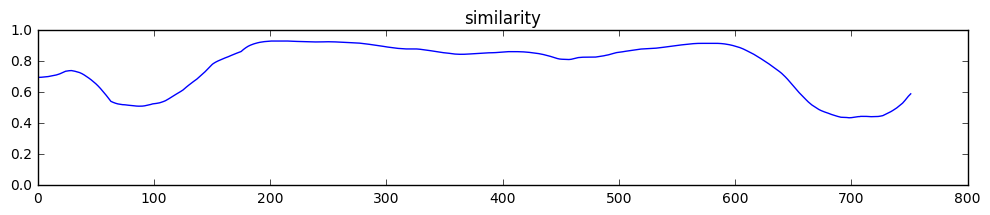

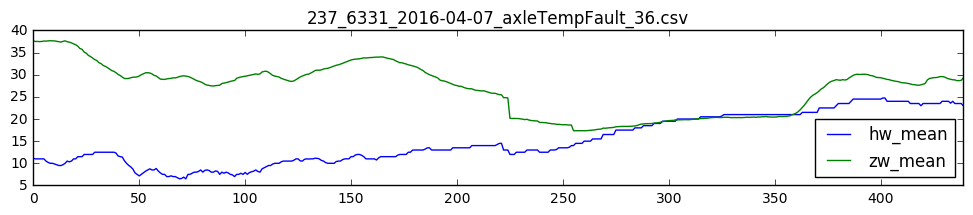

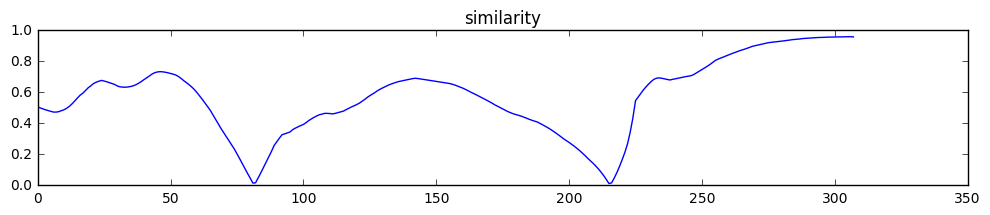

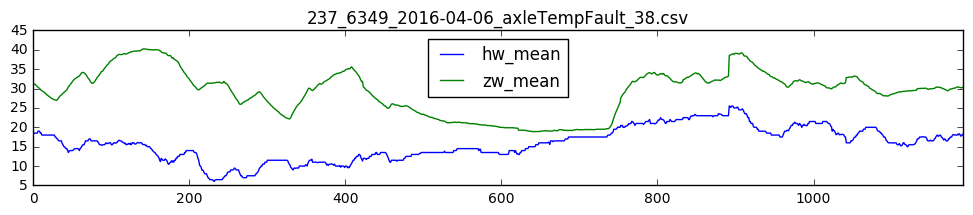

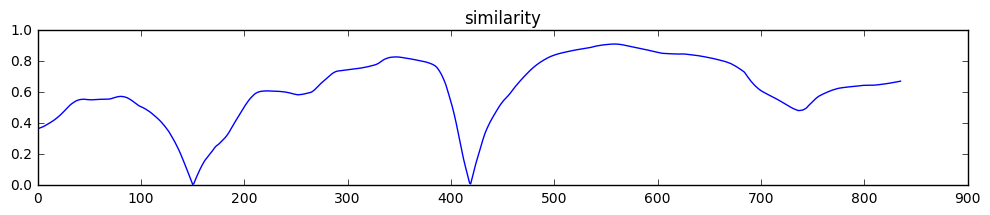

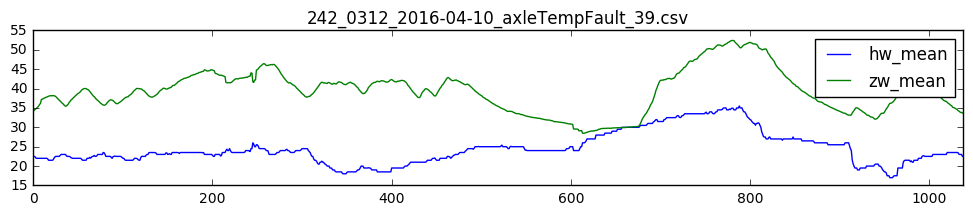

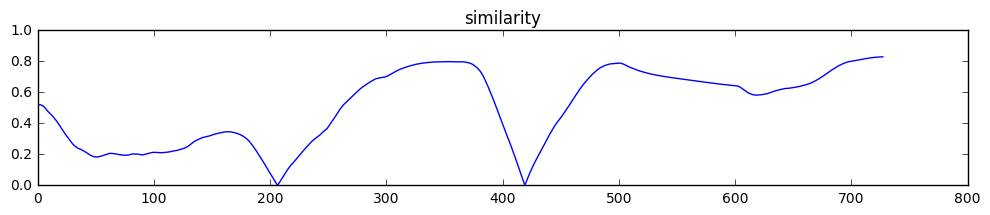

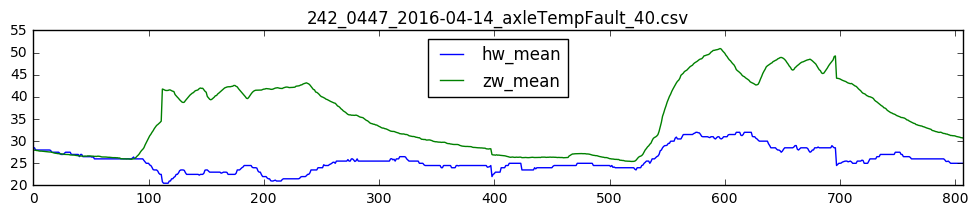

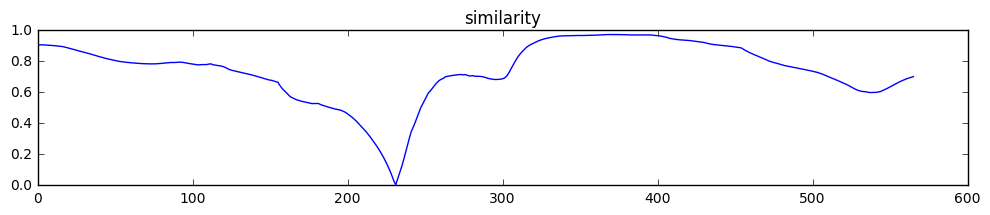

In [24]:
data_dir = root_dir + "/data_fault/smooth_mean_interpolate_bin_mean/"
temp_mean(data_dir)

## ------------------------------------------

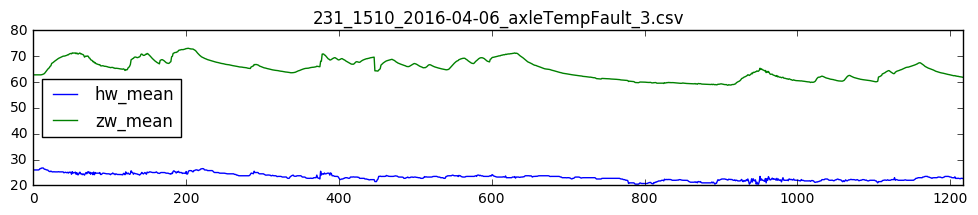

In [12]:
data_dir = root_dir + "/data_fault/smooth_mean_interpolate_bin_mean/"
filelist = base.get_files_csv(data_dir)
file_fault = filelist[1]
path = data_dir + file_fault
df = get_temp_mean(path)
ax = df.plot(figsize=(12,2))
ax.set_title(file)
ax.legend(loc='best')

In [13]:
df.corr()

hw_mean  zw_mean
hw_mean  1.00000  0.70718
zw_mean  0.70718  1.00000

In [25]:
def DTWDistance1(s1, s2):
    DTW = {}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])

    return np.sqrt(DTW[len(s1) - 1, len(s2) - 1])


def DTWDistanceW(s1, s2, w):
    DTW = {}

    w = max(w, abs(len(s1) - len(s2)))

    for i in range(-1, len(s1)):
        for j in range(-1, len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i - w), min(len(s2), i + w)):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])

    return np.sqrt(DTW[len(s1) - 1, len(s2) - 1])


def cluster(data, threshold=1000):
    varnames = data.columns
    i_clust = 0
    clust = {}
    for name in varnames:
        result = []
        for name2 in varnames:
            result.append(DTWDistanceW(data[name], data[name2], 10))
        name_list = list()
        dist_list = list()
        for i in np.arange(len(result)):
            if result[i] < threshold:
                name_list.append(varnames[i])
                dist_list.append(result[i])

        find = False
        for key in clust:
            if set(name_list) == set(clust[key]):
                find = True
                break
        if find == False:
            clust[i_clust] = name_list
            i_clust += 1

    return clust

def cluster(data, threshold=600):
    varnames = data.columns
    i_clust = 0
    clust = {}
    for name in varnames:
        result = []
        for name2 in varnames:
            result.append(DTWDistanceW(data[name], data[name2], 10))
        name_list = list()
        dist_list = list()
        for i in np.arange(len(result)):
            if(result[i]<threshold):
                name_list.append(varnames[i])
                dist_list.append(result[i])
        find = False
        for key in clust:
            if set(name_list) == set(clust[key]):
                find = True
                break
        if find == False:
            clust[i_clust] = name_list
            i_clust +=1
    return clust


def cluster_batch(data_dir):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        data = pd.read_csv(data_dir + file)
        del data['BTSJ']
        result = cluster(data)
        print("-------------------------------------------------------")
        print("********process file: {}*********".format(file))
        for key in result:
            print(result[key])

In [26]:
data_no = 'data_fault'
data_dir = root_dir + "/{}/smooth_mean_interpolate_bin_mean/".format(data_no)
cluster_batch(data_dir)
print("---------------processing for data：{}".format(data_no))

-------------------------------------------------------
********process file: 162_0087_2016-04-25_axleTempFault_2.csv*********
['ZD_CNT']
['ZD_LCG']
['ZD_TFG']
['ZD_JHG']
['ZD_LLJ', 'ZD_SPEED', 'SP_CCBGZ', 'SP_TDZJGZ', 'ZX_BJ_1', 'ZX_BJ_2', 'ZX_BJ_3', 'ZX_BJ_4', 'ZX_BJ_5', 'ZX_BJ_6', 'LG_YDL_1', 'LG_SRDY_1', 'LG_SCDY_1', 'LG_SCDL_1', 'LG_BDY_1', 'LG_LDL_2', 'LG_YDL_2', 'LG_SRDY_2', 'LG_SCDY_2', 'LG_SCDL_2', 'LG_BDY_2']
['ZX_HW1_1', 'ZX_HW2_1', 'ZX_HW1_2', 'ZX_HW2_2', 'ZX_HW1_3', 'ZX_HW2_3', 'ZX_HW1_4', 'ZX_HW2_4', 'ZX_HW1_5', 'ZX_HW2_5', 'ZX_HW1_6', 'ZX_HW2_6', 'ZX_WD_1_1', 'ZX_WD_1_2', 'ZX_WD_1_3', 'ZX_WD_1_4', 'ZX_WD_1_5', 'ZX_WD_1_6', 'ZX_WD_2_1', 'ZX_WD_2_2', 'ZX_WD_2_3', 'ZX_WD_2_4', 'ZX_WD_2_5', 'ZX_WD_2_6', 'ZX_WD_3_1', 'ZX_WD_3_2', 'ZX_WD_3_3', 'ZX_WD_3_4', 'ZX_WD_3_5', 'ZX_WD_3_6', 'ZX_WD_4_1', 'ZX_WD_4_2', 'ZX_WD_4_3', 'ZX_WD_4_4', 'ZX_WD_4_5', 'ZX_WD_4_6', 'ZX_WD_5_1', 'ZX_WD_5_2', 'ZX_WD_5_3', 'ZX_WD_5_4', 'ZX_WD_5_5', 'ZX_WD_5_6', 'ZX_WD_6_1', 'ZX_WD_6_2', 'ZX_WD_6_3', 'ZX